# AutoML: Decision Trees

## Install and Import Libraries

In [1]:
! pip install h2o

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/265.3 MB ? eta -:--:--
     ---------------------------------------- 0.4/265.3 MB 9.2 MB/s eta 0:00:29
     --------------------------------------- 1.2/265.3 MB 15.1 MB/s eta 0:00:18
     --------------------------------------- 2.0/265.3 MB 13.9 MB/s eta 0:00:19
     --------------------------------------- 2.8/265.3 MB 14.6 MB/s eta 0:00:18
      -------------------------------------- 3.6/265.3 MB 15.1 MB/s eta 0:00:18
      -------------------------------------- 4.3/265.3 MB 15.2 MB/s eta 0:00:18
      -------------------------------------- 5.1/265.3 MB 15.5 MB/s eta 0:00:17
      -------------------------------------- 5.9/265.3 MB 15.6 MB/s eta 0:00:17
      -------------------------------------- 6.7/265.3 MB 15.8 MB/s eta 0:00:17
     - ------------------------------------- 7.4/265.3 MB 15.7 M

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2ODecisionTreeEstimator
import pandas as pd

In [2]:
# Initialize H2O cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 21.0.2+13-LTS-58, mixed mode, sharing)
  Starting server from C:\Users\yashp\AppData\Roaming\Python\Python311\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\yashp\AppData\Local\Temp\tmpidp_a89s
  JVM stdout: C:\Users\yashp\AppData\Local\Temp\tmpidp_a89s\h2o_yashp_started_from_python.out
  JVM stderr: C:\Users\yashp\AppData\Local\Temp\tmpidp_a89s\h2o_yashp_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,10 secs
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,2 months and 6 days
H2O_cluster_name:,H2O_from_python_yashp_l033ke
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.782 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


## Load the dataset

In [3]:
data = pd.read_csv('Campus_Selection.csv')
data.head(12)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed


## Checking for Null Values

In [4]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

## H20 AutoML Steps to follow

### Convert pandas dataframe to H2O frame

In [6]:
data_h2o = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


### Define Features and Target Variable

In [7]:
y = 'status' 
x = data_h2o.columns
x.remove(y)

## Split Data into Train and Test Sets

In [8]:
train, test = data_h2o.split_frame(ratios=[.8], seed=32)

### Train Decision Tree Model

In [9]:
dt_model = H2ODecisionTreeEstimator(max_depth=5, min_rows=10)
dt_model.train(x=x, y=y, training_frame=train)

dt Model Build progress: |███████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODecisionTreeEstimator : Decision Tree
Model Key: DT_model_python_1726476276668_1

No summary for this model

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

### Evaluate Model Performance on Training Data

In [10]:
train_performance = dt_model.model_performance(train)
train_accuracy = train_performance.accuracy()[0][1]
train_logloss = train_performance.logloss()
train_auc = train_performance.auc()

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training LogLoss: {train_logloss:.4f}")
print(f"Training AUC: {train_auc:.4f}")

Training Accuracy: 0.8902
Training LogLoss: 0.1776
Training AUC: 0.9686


### Evaluate Model Performance on Test Data

In [11]:
# Evaluate performance on the testing set
test_performance = dt_model.model_performance(test)
test_accuracy = test_performance.accuracy()[0][1]
test_logloss = test_performance.logloss()
test_auc = test_performance.auc()

print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Testing LogLoss: {test_logloss:.4f}")
print(f"Testing AUC: {test_auc:.4f}")

Testing Accuracy: 0.8571
Testing LogLoss: 2.6511
Testing AUC: 0.8488


### Display Comprehensive Model Performance by H20

In [12]:
# Evaluate the model performance on the test set
performance_test = dt_model.model_performance(test)
print("Decision Tree Model Test Set Performance:")
print(performance_test)

Decision Tree Model Test Set Performance:
ModelMetricsBinomial: dt
** Reported on test data. **

MSE: 0.13549899456743986
RMSE: 0.36810188068989796
LogLoss: 2.6510873869459735
Mean Per-Class Error: 0.18832891246684352
AUC: 0.8488063660477454
AUCPR: 0.8938543110174213
Gini: 0.6976127320954908

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48275862068965514
            Not Placed    Placed    Error    Rate
----------  ------------  --------  -------  ----------
Not Placed  9             4         0.3077   (4.0/13.0)
Placed      2             27        0.069    (2.0/29.0)
Total       11            31        0.1429   (6.0/42.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.482759     0.9       2
max f2                       0.333333     0.927152  4
max f0point5                 0.482759     0.882353  2
max accuracy      

### Hyperparameters

In [13]:
print(f"Hyperparameters of the model: {dt_model.params}")

Hyperparameters of the model: {'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'DT_model_python_1726476276668_1', 'type': 'Key<Model>', 'URL': '/3/Models/DT_model_python_1726476276668_1'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_2_sid_ab31', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_2_sid_ab31'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_2_sid_ab31', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_2_sid_ab31'}}, 'ignored_columns': {'default': None, 'actual': None, 'input': None}, 'ignore_const_cols': {'default': True, 'actual': True, 'input': True}, 'categorical_encoding': {'default': 'AUTO', 'actual': 'AUTO', 'input': 'AUTO'}, 'response_column': {'default': None, 'actual': {'__meta': {'schema_version': 3,

### Visualize ROC Curve

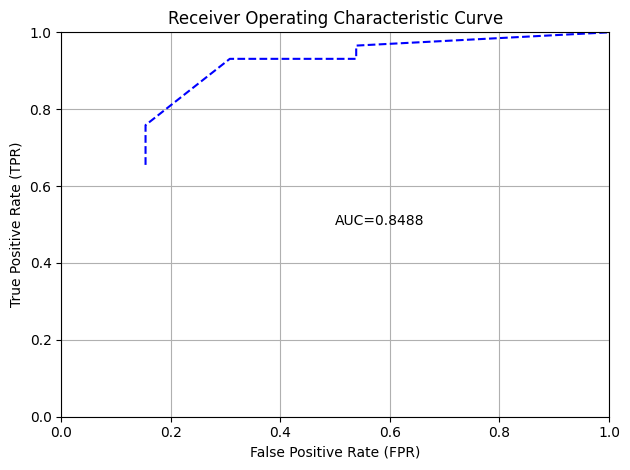

([0.15384615384615385,
  0.15384615384615385,
  0.3076923076923077,
  0.5384615384615384,
  0.5384615384615384,
  1.0],
 [0.6551724137931034,
  0.7586206896551724,
  0.9310344827586207,
  0.9310344827586207,
  0.9655172413793104,
  1.0])

In [14]:
# Evaluate model performance on the test set
perf = dt_model.model_performance(test)

# Plot ROC curve using H2O's built-in function
perf.plot(type='roc')